In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [2]:
data = pd.read_excel("Data Analyst - Test Data.xlsx") 
data

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [3]:
data.shape

(6448, 3)

In [4]:
data.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Review    6393 non-null   object        
 1   date      6448 non-null   datetime64[ns]
 2   Location  1711 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 151.3+ KB


In [6]:
data.isnull().sum()/6448

Review      0.008530
date        0.000000
Location    0.734646
dtype: float64

*73% of the location is null*

In [7]:
data['date'].describe()

count                             6448
mean     2019-02-06 15:55:09.677419264
min                2018-08-01 00:00:00
25%                2018-11-10 00:00:00
50%                2019-02-04 00:00:00
75%                2019-05-01 00:00:00
max                2019-08-20 00:00:00
Name: date, dtype: object

In [8]:
data['Review'][0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less'

In [9]:
min_date = data['date'].min()
min_date

Timestamp('2018-08-01 00:00:00')

In [10]:
max_date = data['date'].max()
max_date

Timestamp('2019-08-20 00:00:00')

*Data ranges from 2018 to 2019*

In [11]:
data.replace(regex=[r'Read'], value=' ', inplace=True)

In [12]:
data.replace(regex=[r'more'], value=' ', inplace=True)

In [13]:
data.replace(regex=[r'less'], value=' ', inplace=True)

In [14]:
data['Review'][0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n     \n     '

In [15]:
data['Location'].value_counts().nlargest(10)

Location
United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
Florida                      16
United Kingdom               14
New York, NY                 13
Miami                        12
Orlando                      12
Name: count, dtype: int64

In [16]:
def ny(string):
    string = string.replace('New York, NY ','New York')
    return string

In [17]:
top = ['United States of America', 'New York', 'California', 'San Jose', 'Canada', 'Florida', 'United Kingdom', 'New York', 'Miami', 'Orlando']

In [18]:
new_data = data[data['Location'].isin(top)]

In [19]:
new_data.head()

,Review,date,Location
10,Very clean and friendly and I love the locatio...,2019-08-19,California
62,I like everything in the hotel the personal ve...,2019-08-12,Miami
103,Need staff at the chk in. My wait while my f...,2019-08-09,New York
148,"I didn't like having trouble checking, and als...",2019-08-05,New York
175,Family and I stayed here for three nights. Rea...,2019-08-04,California


In [20]:
new_data = new_data.reset_index()
new_data

,index,Review,date,Location
0,10,Very clean and friendly and I love the locatio...,2019-08-19,California
1,62,I like everything in the hotel the personal ve...,2019-08-12,Miami
2,103,Need staff at the chk in. My wait while my f...,2019-08-09,New York
3,148,"I didn't like having trouble checking, and als...",2019-08-05,New York
4,175,Family and I stayed here for three nights. Rea...,2019-08-04,California
...,...,...,...,...
253,6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
254,6444,·the internet barely worked or didn't work,2019-07-12,United States of America
255,6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
256,6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [21]:
new_data['Location'].value_counts()

Location
United States of America    116
New York                     34
California                   19
San Jose                     19
Florida                      16
Canada                       16
United Kingdom               14
Miami                        12
Orlando                      12
Name: count, dtype: int64

*Most of the people travel to United states of america the most*

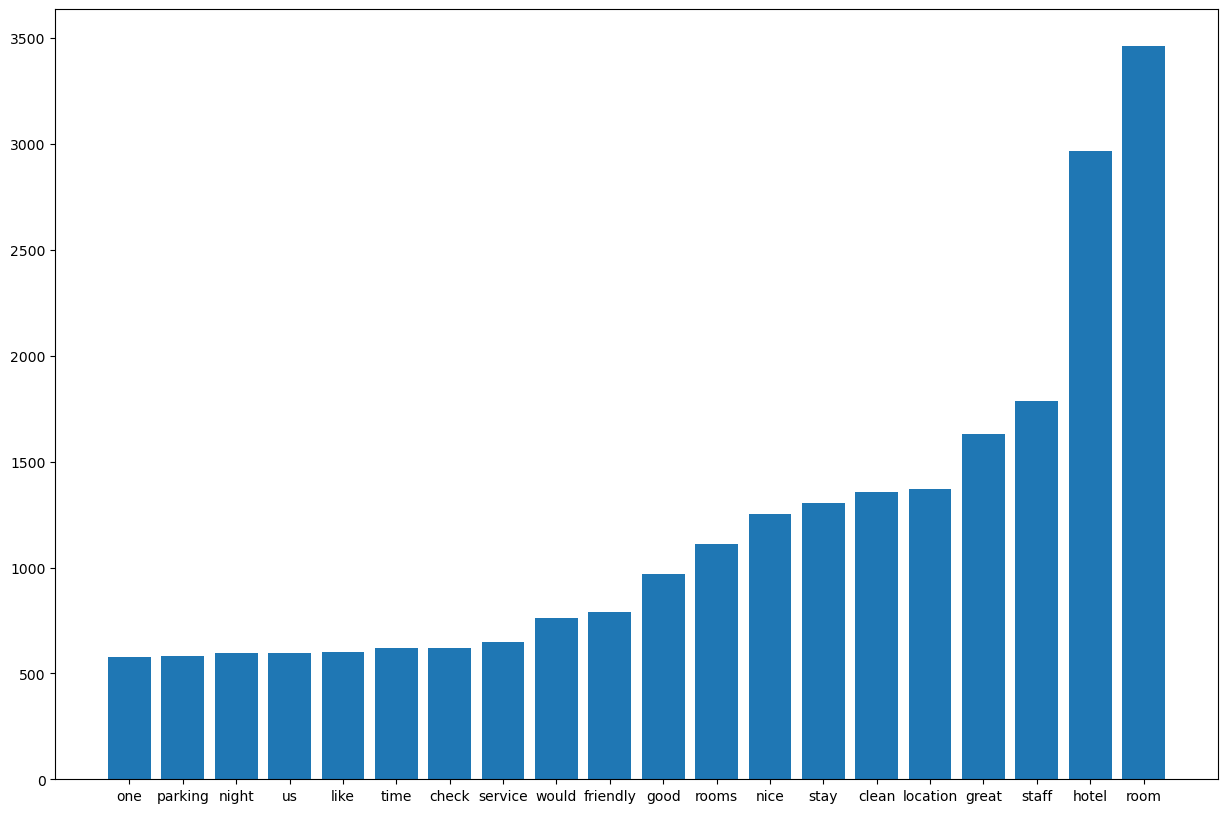

In [23]:
data = data[data['Review'].notna()]
data.Review.replace({r'\n\nRead more\nRead less':' '}, regex=True, inplace=True)
data.Review.replace({r'\n':' '}, regex=True, inplace=True)
data.Review.replace({r'[?!@#$.,]':' '}, regex=True, inplace=True)
data.Review.replace({r'[^\x00-\x7F]+':' '}, regex=True, inplace=True)
data.Review=data.Review.str.lower()

stop_words = set(stopwords.words('english'))
data['rm_stopwords'] = data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

wordsdata=[]
j=0
for i in data['rm_stopwords']:
    wordsdata.extend(i.split())
    
fdistdata = FreqDist(wordsdata)

dict_final_data={k: v for k, v in sorted(fdistdata.items(), key=lambda item: item[1])}
plt.figure(figsize=(15,10))
names = list(dict_final_data.keys())[-20:]
values = list(dict_final_data.values())[-20:]
plt.bar(range(20), values, tick_label=names)
plt.show()

In [24]:
new_data.Review.head()

0    Very clean and friendly and I love the locatio...
1    I like everything in the hotel the personal ve...
2    Need   staff at the chk in. My wait while my f...
3    I didn't like having trouble checking, and als...
4    Family and I stayed here for three nights. Rea...
Name: Review, dtype: object

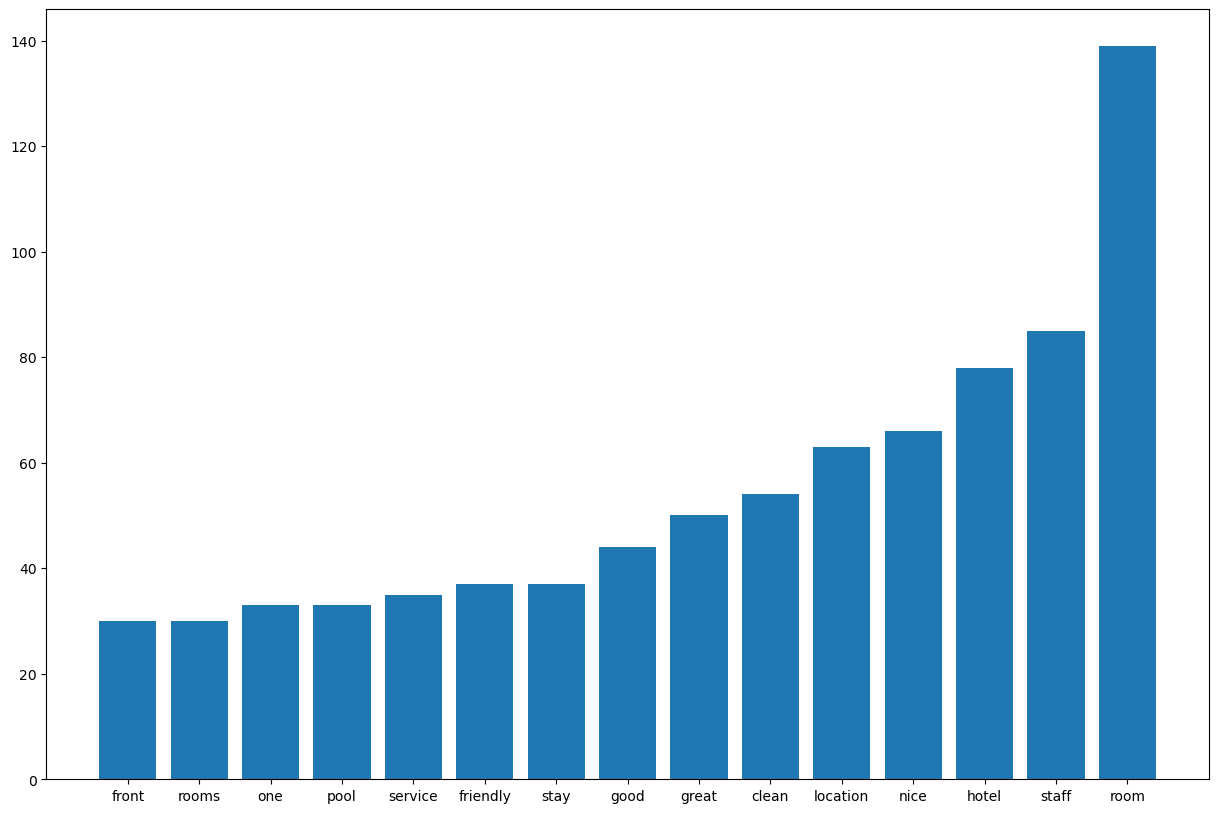

In [25]:
new_data.Review.replace({r'\n\nRead more\nRead less':''}, regex=True, inplace=True)
new_data.Review.replace({r'\n':''}, regex=True, inplace=True)
new_data.Review.replace({r'[?!@#$.,]':''}, regex=True, inplace=True)
new_data.Review.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
new_data.Review=new_data.Review.str.lower()

stop_words = set(stopwords.words('english'))
new_data['rm_stopwords'] = new_data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

words=[]
j=0
for i in new_data['rm_stopwords']:
    words.extend(i.split())
    
fdist = FreqDist(words)

dict_final={k: v for k, v in sorted(fdist.items(), key=lambda item: item[1])}

plt.figure(figsize=(15,10))
names = list(dict_final.keys())[-15:]
values = list(dict_final.values())[-15:]
plt.bar(range(15), values, tick_label=names)
plt.show()

*People talk about room, staff and hotel the most*

In [26]:
for i in top:
    loc=new_data[new_data['Location']==i]
    print(loc.groupby('Location')['rm_stopwords'].apply(lambda x: nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(x)))).nlargest(10))

Location                          
United States of America  room        55
                          staff       40
                          location    37
                          hotel       23
                          service     23
                          good        22
                          clean       21
                          great       18
                          pool        17
                          friendly    16
Name: rm_stopwords, dtype: int64
Location            
New York  room          20
          hotel         19
          nice          12
          staff         11
          front         11
          everything    10
          stay          10
          like           9
          one            9
          desk           9
Name: rm_stopwords, dtype: int64
Location            
California  hotel       14
            nice        11
            room        11
            clean        7
            staff        6
            night        6
            cou

In [27]:
new_data['date1'] = new_data['date'].copy()

In [28]:
def year(string):
    year=string.year
    return year

In [29]:
new_data['year']=new_data['date1'].apply(year)

In [30]:
years = [2018, 2019]

In [31]:
for i in years:
    year=new_data[new_data['year']==i]
    print(year.groupby('year')['rm_stopwords'].apply(lambda x: nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(x)))).nlargest(10))

year          
2018  room        54
      hotel       41
      nice        37
      staff       28
      clean       23
      great       18
      stay        18
      rooms       15
      location    15
      front       15
Name: rm_stopwords, dtype: int64
year          
2019  room        86
      staff       57
      location    49
      hotel       39
      great       33
      clean       31
      good        31
      service     30
      one         29
      nice        29
Name: rm_stopwords, dtype: int64


*In the year 2018 people talk about room, hotel the most*

*In the year 2019 people talk about room, staff and location the most*